<td>
   <a target="_blank" href="https://www.clarifai.com/" ><img src="https://upload.wikimedia.org/wikipedia/commons/b/bc/Clarifai_Logo_FC_Web.png" width=256/></a>
</td>

<td>
<a href="https://colab.research.google.com/github/Clarifai/examples/blob/main/models/model_predict.ipynb" target="_blank"><img
src="https://colab.research.google.com/assets/colab-badge.svg" alt="Colab"></a>
</td>


This notebook provides an introduction to using the Clarifai SDK to interact with prediction APIs for various AI models. 

To get predictions for an input, you need to supply an input and the model you'd like to get predictions from. 
Input can be formed from any of url or filepath or raw bytes

Notebook is structured into sections based on the type of input the models accept
 - Text
 - Image
 - Video
 - Audio

The final section delves into the potential of configuring additional parameters (such as threshold and concepts) to enhance the flexibility of prediction operations. <br>
_______
On the [Clarifai Community](https://clarifai.com/explore) explore page, you can click the [Models](https://clarifai.com/explore/models) tab to search and access the models available for everyone to use. 

# Getting Started

### Installation

In [ ]:
! pip install clarifai

In [3]:
import os
os.environ["CLARIFAI_PAT"] = "PAT" # replace with your own PAT key here

*Note: Guide to get your [PAT](https://docs.clarifai.com/clarifai-basics/authentication/personal-access-tokens)*

### For Colab
To access data files from Clarifai examples repo, you can clone the repo

In [ ]:
!git clone https://github.com/Clarifai/examples.git
%cd /content/examples/

### Listing of Models


Here's an example on how to list all models in Clarifai community filtered by model_type, description

In [23]:
from clarifai.client.app import App

all_llm_community_models = App().list_models(filter_by={"query": "LLM",
                                                        "model_type_id": "text-to-text"}, only_in_app=False)

for llm_model in all_llm_community_models:
  print("Model ID ", llm_model.id)

Model ID  tiiuae-falcon-7b-instruct
Model ID  wizardLM-13B
Model ID  wizardLM-70B
Model ID  zephyr-7B-alpha
Model ID  llama2-70b-chat
Model ID  openHermes-2-mistral-7B
Model ID  mistral-7B-Instruct
Model ID  wizardCoder-Python-34B
Model ID  mistral-7B-OpenOrca
Model ID  GPT-3_5-turbo
Model ID  GPT-4
Model ID  gpt-3_5-turbo-instruct
Model ID  wizardCoder-15B
Model ID  phi-1_5
Model ID  falcon-40b-instruct
Model ID  llama2-7b-chat
Model ID  llama2-13b-chat
Model ID  dolly-v2-12b
Model ID  RedPajama-INCITE-7B-Chat
Model ID  StarCoder
Model ID  claude-instant-1_2
Model ID  xgen-7b-8k-instruct
Model ID  mpt-7b-instruct
Model ID  text-bison
Model ID  code-bison
Model ID  code-gecko
Model ID  cohere-generate-command
Model ID  claude-v2
Model ID  claude-v1
Model ID  claude-instant
Model ID  Jurassic2-Jumbo-Instruct
Model ID  Jurassic2-Grande-Instruct
Model ID  Jurassic2-Large
Model ID  Jurassic2-Jumbo
Model ID  Jurassic2-Grande
Model ID  bigscience-bloom-560m


### Get Model Details

Below cell is how to know more on details of model(description, usecases..etc) and info on training or other inference parameters(eg: temperature, top_k, max_tokens..etc for LLMs)

In [ ]:
from clarifai.client.user import User
gpt_4_model = User(user_id="openai").app(app_id="chat-completion").model(model_id="GPT-4")
print(gpt_4_model)

# Model Inference

Model class objects can be inititalised by providing its URL or also by defining respective `user_id`, `app_id` and `model_id`

In [1]:
# import Model class
from clarifai.client.model import Model

In [ ]:
model = Model("https://clarifai.com/clarifai/main/models/general-image-recognition")
                    # or
model = Model(user_id="clarifai", app_id="main", model_id="general-image-recognition")

## Text

### Text-to-Text

Model takes text data as input by filename or bytes or url.

Below is an example of how you would send text bytes/filepath and receive predictions from Clarifai's hosted models

#### Predict by Bytes

**Text Generation** - Generating text from an LLM

In [24]:
# Asking Claude2 to write a tweet on future of AI
model_url = "https://clarifai.com/anthropic/completion/models/claude-v2"
model_prediction = Model(model_url).predict_by_bytes(b"Write a tweet on future of AI", input_type="text")

# Get the output
print(model_prediction.outputs[-1].data.text.raw)

 Here is a draft 280 character tweet on the future of AI:

The future of AI is bright! With advanced algorithms and vast datasets, AI will become more capable and ubiquitous. But we must ensure it's aligned with human values. By working together, we can create an AI future that benefits society while avoiding risks. The path ahead has challenges but I'm optimistic if we steer wisely! #AI #ethics #progress


#### Predict by FilePath

**Text Classification** - Sentiment Classification for given text input

In [ ]:
# Text sentiment analysis with 3 classes positive, negative, neutral.
model_url = "https://clarifai.com/erfan/text-classification/models/sentiment-analysis-twitter-roberta-base"
file_path = "datasets/upload/data/text_files/positive/0_9.txt"
model_prediction = Model(model_url).predict_by_filepath(file_path, input_type="text")

# Get the output
print(model_prediction.outputs[-1].data.concepts)

### Text-To-Image

**Image Generation** - Generate an Image from given input Prompt

In [26]:
# Image Generation using Stable Diffusion XL
model_url = "https://clarifai.com/stability-ai/stable-diffusion-2/models/stable-diffusion-xl"
model_prediction = Model(model_url).predict_by_bytes(b"A painting of a cat", input_type="text")

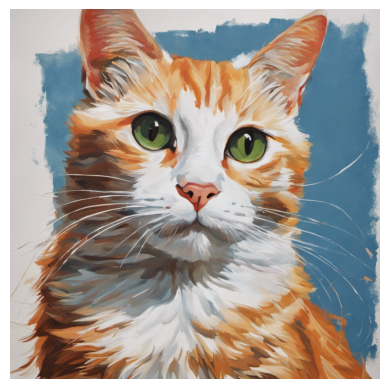

In [27]:
# Display the image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Base64 image to numpy array
im_b = model_prediction.outputs[0].data.image.base64
image_np = np.frombuffer(im_b, np.uint8)
img_np = cv2.imdecode(image_np, cv2.IMREAD_COLOR)  

plt.axis('off')
plt.imshow(img_np[...,::-1])

### Text-To-Audio
Generate Audio from given text

In [ ]:
model_url = "https://clarifai.com/eleven-labs/audio-generation/models/speech-synthesis"

model_prediction = Model(model_url).predict_by_bytes(b"Hello, How are you doing today!", "text")

# Save the audio file
with open('output_audio.wav', mode='bx') as f:
    f.write(model_prediction.outputs[0].data.audio.base64)

## Image

### Image-To-Text

**Image Captioning** - Generate Caption for the given input Image

In [28]:
model_url = "https://clarifai.com/salesforce/blip/models/general-english-image-caption-blip"
image_url = "https://s3.amazonaws.com/samples.clarifai.com/featured-models/image-captioning-statue-of-liberty.jpeg"
model_prediction = Model(model_url).predict_by_url(image_url, input_type="image")

# Get the output
print(model_prediction.outputs[0].data.text.raw)

a photograph of a statue of liberty in front of a blue sky


**Visual classification**

**Input**: Image

**Output**: Concepts

Visual classification, also known as image classification, is the process of categorizing images into predefined classes based on their visual content. Machine learning models are employed to recognize patterns within images and assign them to the appropriate class.

After training, these models can classify new, unseen images by analyzing their visual content and assigning them to predefined categories based on what they've learned during training.

Below is an example of how you would send image URLs and receive predictions from Clarifai's `general-image-recognition` model.

In [29]:
model_url = "https://clarifai.com/clarifai/main/models/general-image-recognition"
image_url = "https://samples.clarifai.com/metro-north.jpg"
model_prediction = Model(model_url).predict_by_url(image_url, input_type="image")

# Get the output
print(model_prediction.outputs[0].data)

concepts {
  id: "ai_HLmqFqBf"
  name: "train"
  value: 0.999604881
  app_id: "main"
}
concepts {
  id: "ai_fvlBqXZR"
  name: "railway"
  value: 0.999297619
  app_id: "main"
}
concepts {
  id: "ai_SHNDcmJ3"
  name: "subway system"
  value: 0.99825567
  app_id: "main"
}
concepts {
  id: "ai_6kTjGfF6"
  name: "station"
  value: 0.998010933
  app_id: "main"
}
concepts {
  id: "ai_RRXLczch"
  name: "locomotive"
  value: 0.997254908
  app_id: "main"
}
concepts {
  id: "ai_Xxjc3MhT"
  name: "transportation system"
  value: 0.996976852
  app_id: "main"
}
concepts {
  id: "ai_VRmbGVWh"
  name: "travel"
  value: 0.988967717
  app_id: "main"
}
concepts {
  id: "ai_jlb9q33b"
  name: "commuter"
  value: 0.98089534
  app_id: "main"
}
concepts {
  id: "ai_2gkfMDsM"
  name: "platform"
  value: 0.980635285
  app_id: "main"
}
concepts {
  id: "ai_n9vjC1jB"
  name: "light"
  value: 0.974186838
  app_id: "main"
}
concepts {
  id: "ai_sQQj52KZ"
  name: "train station"
  value: 0.96878773
  app_id: "main"


**Visual Detection**

**Input**: Image

**Output**: Regions[...].data.concepts,regions[...].region_info

Visual detection, also known as object detection, involves identifying and locating objects or specific regions of interest within images.

Unlike image classification, which assigns a single label or category to the entire image, visual detection provides more detailed information by detecting and outlining multiple objects or regions within the image, associating them with specific classes or labels.

Visual detection models are trained on labeled datasets with class labels and bounding box coordinates, enabling them to recognize object patterns and positions during inferencing.

Below is an example of how you would perform visual detection using the Clarifai's `general-image-detection` model.

In [40]:
DETECTION_IMAGE_URL = 'https://s3.amazonaws.com/samples.clarifai.com/featured-models/general-elephants.jpg'

detector_model = Model("https://clarifai.com/clarifai/main/models/general-image-detection")

prediction_response = detector_model.predict_by_url(DETECTION_IMAGE_URL, input_type="image")

# Since we have one input, one output will exist here
regions = prediction_response.outputs[0].data.regions

for region in regions:
    # Accessing and rounding the bounding box values
    top_row = round(region.region_info.bounding_box.top_row, 3)
    left_col = round(region.region_info.bounding_box.left_col, 3)
    bottom_row = round(region.region_info.bounding_box.bottom_row, 3)
    right_col = round(region.region_info.bounding_box.right_col, 3)
    
    for concept in region.data.concepts:
        # Accessing and rounding the concept value
        name = concept.name
        value = round(concept.value, 4)

        print((f"{name}: {value} BBox: {top_row}, {left_col}, {bottom_row}, {right_col}"))

# Uncomment this line to print the full Response JSON
# print(output)


Elephant: 0.9786 BBox: 0.463, 0.069, 0.721, 0.331
Elephant: 0.9689 BBox: 0.484, 0.322, 0.717, 0.604
Elephant: 0.9664 BBox: 0.52, 0.735, 0.72, 0.939
Elephant: 0.9649 BBox: 0.619, 0.596, 0.712, 0.695
Plant: 0.6449 BBox: 0.462, 0.013, 0.983, 0.992
Tree: 0.5103 BBox: 0.367, 0.951, 0.413, 0.993
Tree: 0.5034 BBox: 0.412, 0.295, 0.47, 0.337
Plant: 0.3437 BBox: 0.714, 0.783, 0.873, 0.897


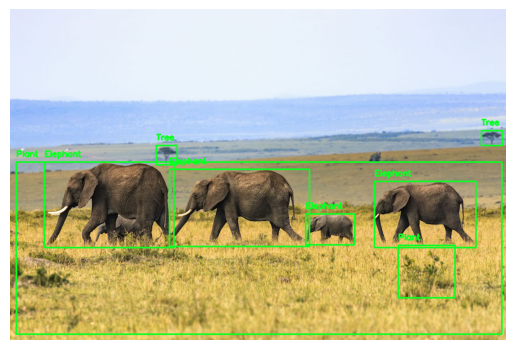

In [41]:
# Display the prediction bboxes
import cv2
from urllib.request import urlopen
import numpy as np

req = urlopen(DETECTION_IMAGE_URL)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'

for region in regions:
    # Accessing and rounding the bounding box values
    top_row = round(region.region_info.bounding_box.top_row, 3) * img.shape[0]
    left_col = round(region.region_info.bounding_box.left_col, 3)* img.shape[1]
    bottom_row = round(region.region_info.bounding_box.bottom_row, 3)* img.shape[0]
    right_col = round(region.region_info.bounding_box.right_col, 3)* img.shape[1]

    cv2.rectangle(img, (int(left_col),int(top_row)), (int(right_col),int(bottom_row)), (36,255,12), 2)

    # Get concept name
    concept_name = region.data.concepts[0].name 

    # Display text 
    cv2.putText(img, concept_name, (int(left_col),int(top_row-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 2) 

plt.axis('off')
plt.imshow(img[...,::-1])

**Visual Segmentation**

**Input**: Image

**Output**: Regions[...].region_info.mask,regions[...].data.con

Visual segmentation, or image segmentation, involves partitioning an image into distinct regions, each representing a meaningful object or component. Its purpose is to break down an image into meaningful parts, making it easier to analyze and understand.

This is achieved by assigning labels to individual pixels based on shared characteristics. Image segmentation is commonly used to locate objects and boundaries in images, resulting in a set of segments that cover the entire image or a set of extracted contours.

Below is an example of how you would perform visual segmentation using the Clarifai's `image-general-segmentation` model.

In [61]:
SEGMENT_IMAGE_URL = 'https://s3.amazonaws.com/samples.clarifai.com/featured-models/general-elephants.jpg'

segmentor_model = Model("https://clarifai.com/clarifai/main/models/image-general-segmentation")

prediction_response = segmentor_model.predict_by_url(SEGMENT_IMAGE_URL, input_type="image")

regions = prediction_response.outputs[0].data.regions

for region in regions:
    for concept in region.data.concepts:
        # Accessing and rounding the concept's percentage of image covered
        name = concept.name
        value = round(concept.value, 4)
        print((f"{name}: {value}"))

grass: 0.4781
sky-other: 0.2728
elephant: 0.1114
mountain: 0.085
hill: 0.0523
sea: 0.0002
dirt: 0.0001
tree: 0.0


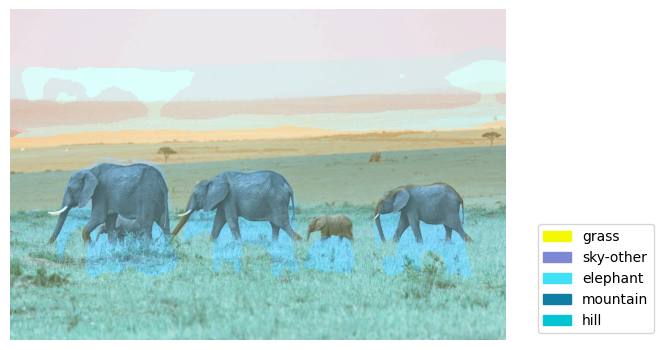

In [62]:
# Display the predicted masks
import cv2
from urllib.request import urlopen
import numpy as np
from PIL import Image as PILImage
from io import BytesIO
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

req = urlopen(SEGMENT_IMAGE_URL)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'

masks = []
concepts = []
for region in regions:
  if region.data.concepts[0].value > 0.05:
    masks.append(np.array(PILImage.open(BytesIO(region.region_info.mask.image.base64))))
    concepts.append(region.data.concepts[0].name)


# Generate random colors
colors = []
for i in range(len(masks)):
  r = random.randint(0,255)
  g = random.randint(0,255)
  b = random.randint(0,255)
  colors.append((b,g,r))

# Map masks to overlays
overlays = []
for i in range(len(masks)):
  mask = masks[i]
  color = colors[i]

  overlay = np.zeros_like(img)
  overlay[mask > 0] = color

  overlays.append(overlay)

# Overlay masks on original image
overlayed = np.copy(img)

for overlay in overlays:
  # Apply alpha blending
  cv2.addWeighted(overlay, 0.15, overlayed, 0.85, 0, overlayed)

overlayed = cv2.convertScaleAbs(overlayed, alpha=1.5, beta=50)


# Display overlayed image
plt.imshow(overlayed) 

# Create legend with colors and concepts
legend_items = []
for i in range(len(overlays)):
  color = [c/255 for c in colors[i]]
  concept = concepts[i]
  legend_items.append(mpatches.Patch(color=color, label=concept))

plt.legend(handles=legend_items, loc='lower left', bbox_to_anchor=(1.05, 0))
plt.axis('off')
plt.show()

## Video

Here's an example of inference on video input where we also define `sample_ms` parameter to run prediction every 2000ms

In [22]:
BEER_VIDEO_URL = "https://samples.clarifai.com/beer.mp4"

model = Model("https://clarifai.com/clarifai/main/models/general-image-recognition")

output_config={
          "sample_ms": 2000 #Run inference every 2 seconds
      }
model_prediction = model.predict_by_url(BEER_VIDEO_URL, input_type="video", output_config=output_config)

# Print the frame info and the first concept name in each frame
for frame in model_prediction.outputs[0].data.frames:
    print(f"Frame Info: {frame.frame_info} Concept: {frame.data.concepts[0].name}\n")


Frame Info: time: 1000
 Concept: beer

Frame Info: index: 1
time: 3000
 Concept: beer

Frame Info: index: 2
time: 5000
 Concept: beer

Frame Info: index: 3
time: 7000
 Concept: beer

Frame Info: index: 4
time: 9000
 Concept: beer



## Audio

### Audio to Text

Transcribe Audio to text

In [ ]:
audio_url = "https://s3.amazonaws.com/samples.clarifai.com/GoodMorning.wav"
model_url = "https://clarifai.com/facebook/asr/models/asr-wav2vec2-large-robust-ft-swbd-300h-english"
model_prediction = Model(model_url).predict_by_url(audio_url, "audio")

# Print the output
print(model_prediction.outputs[0].data.text.raw)

## Prediction Parameters
You can set additional parameters to gain flexibility in the predict operation.


### Inference Parameters

Fine-tuning hyperparameters provides precise control over model behavior and prediction outputs. By adjusting these parameters, you can customize models to suit your specific needs: 

Some of the parameters for text-to-text LLMs are: <br>
**Temperature** (temperature) - Controls randomness and creativity. Higher values increase diversity while lower values make output more focused and deterministic. <br>
**Max Tokens** (max_tokens) - Limits length of generated text. Useful for constraining model responses to a fixed size. <br>
**Top K** (top_k) - Controls output diversity by limiting vocab to top K likely tokens per step. Lower K gives more focused results while higher K increases variety.

Possible parameters for a model can be found in `OutputInfo Params` obtained by printing the model object. <br>
`print(Model("https://clarifai.com/segmind/segmind-stable-diffusion/models/ssd-1b"))`

##### Setting `temperature`, `max_tokens` for GPT-4

In [ ]:

gpt_4_model = Model("https://clarifai.com/openai/chat-completion/models/GPT-4")

query_text = """What is the best way to invest my money? I have a 401(k) and a Roth IRA. 
I also have a savings account. I want to make sure I am doing the best I can for my money"""

inference_params = dict(temperature=str(0.2), max_tokens=100)
print(gpt_4_model.predict_by_bytes(input_bytes=bytes(query_text, 'utf-8'), 
                                   input_type="text", 
                                   inference_params=inference_params))

##### Setting output `Height` and `Width` for image generation using Segmind-Stable-Diffusion model

In [ ]:


inference_params = dict(height=512, width=512)
ssd_model = Model("https://clarifai.com/segmind/segmind-stable-diffusion/models/ssd-1b")

prompt = '''with smoke, half ice and half fire and ultra realistic in detail.wolf, 
typography, dark fantasy, wildlife photography, vibrant, cinematic and on a black background'''

model_prediction = ssd_model.predict_by_bytes(input_bytes=bytes(prompt, 'utf-8'),
                                            input_type="text",
                                            inference_params=inference_params)

# Display the image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Base64 image to numpy array
im_b = model_prediction.outputs[0].data.image.base64
image_np = np.frombuffer(im_b, np.uint8)
img_np = cv2.imdecode(image_np, cv2.IMREAD_COLOR)  

plt.axis('off')
plt.imshow(img_np[...,::-1])

#### Setting `task` for Audio Speech Recognition model Whisper

In [63]:
inference_params = dict(task="translate")
whisper_model = Model("https://clarifai.com/openai/whisper/models/whisper-large-v2")

spanish_audio_url = "https://s3.amazonaws.com/samples.clarifai.com/featured-models/record_out+(3).wav"
model_prediction = whisper_model.predict_by_url(spanish_audio_url, "audio", inference_params=inference_params)

# Print the translated English output
print("Translated to English: ", model_prediction.outputs[0].data.text.raw)

# Transcribing the audio
inference_params = dict(task="transcribe")
model_prediction = whisper_model.predict_by_url(spanish_audio_url, "audio", inference_params=inference_params)

# Print the transcribed output
print("Transcribed audio: ", model_prediction.outputs[0].data.text.raw)

2023-11-10 20:16:05 INFO     INFO:clarifai:whisper-large-v2 model is still deploying, please wait...   ]8;id=47825;file:///Users/sainivedh/virtualenv/clarifai-python-sdk/lib/python3.9/site-packages/clarifai/client/model.py\model.py]8;;\:]8;id=552303;file:///Users/sainivedh/virtualenv/clarifai-python-sdk/lib/python3.9/site-packages/clarifai/client/model.py#152\152]8;;\

Translated to English:   I'm going to visit my grandmother because she's in the hospital.
Transcribed audio:   Voy a visitar a mi abuela, porque ella está en el hospital.


### Output Config

#### Select Concepts
By putting this additional parameter on your predict calls, you can receive predict value(s) for only the concepts that you want to. 

You can specify particular concepts by either their id and/or their name

In [29]:
from clarifai_grpc.grpc.api import resources_pb2

In [32]:
DOG_IMAGE_URL = "https://samples.clarifai.com/dog2.jpeg"
Model_URL = "https://clarifai.com/clarifai/main/models/general-image-recognition"

In [30]:
selected_concepts = [
      resources_pb2.Concept(name="dog"),
      resources_pb2.Concept(name="cat"),
  ]
output_config={"select_concepts": selected_concepts}
model = Model(Model_URL)

model_prediction = model.predict_by_url(DOG_IMAGE_URL, input_type="image", output_config=output_config)

# Print the output
print(model_prediction.outputs[0].data.concepts)

#### Maximum Concepts

Setting the `max_concepts` parameter will customize how many concepts and their corresponding probability scores the predict endpoint will return. 

If not specified, the predict endpoint will return the top 20 concepts

In [33]:
model = Model(Model_URL)
output_config={"max_concepts": 3}
model_prediction = model.predict_by_url(DOG_IMAGE_URL, input_type="image", output_config=output_config)

# Print the output
print(model_prediction.outputs[0].data.concepts)

#### Minimum Prediction Value

This parameter lets you set a minimum probability threshold for the outputs you want to view for the Predict operation.

For example if you want to see all concepts with a probability score of .95 or higher, this parameter will allow you to accomplish that.

In [ ]:
model = Model(Model_URL)
output_config={"min_value": 0.95}
model_prediction = model.predict_by_url(DOG_IMAGE_URL, input_type="image", output_config=output_config)

# Print the output
print(model_prediction.outputs[0].data.concepts)

### By Model Version ID
By specifying model_version_id in your predict call, you can continue to predict on a previous version, for consistent prediction results. Clarifai also updates its pre-built models on a regular basis.

Below is an example of how you would set a model version ID and receive predictions from Clarifai's `general-image-recognition` model.

In [ ]:
model_version_id = "aa7f35c01e0642fda5cf400f543e7c40"
model_url = f"https://clarifai.com/clarifai/main/models/general-image-recognition/model_version/{model_version_id}"

model = Model(model_url)

model_prediction = model.predict_by_url(DOG_IMAGE_URL, input_type="image")

# Print the output
print(model_prediction.outputs[0].data.concepts)

## Clarifai Resources

**Website**: [https://www.clarifai.com](https://www.clarifai.com/)

**Demo**: [https://clarifai.com/demo](https://clarifai.com/demo)

**Sign up for a free Account**: [https://clarifai.com/signup](https://clarifai.com/signup)

**Developer Guide**: [https://docs.clarifai.com](https://docs.clarifai.com/)

**Clarifai Community**: [https://clarifai.com/explore](https://clarifai.com/explore)

**Python SDK Docs**: [https://docs.clarifai.com/python-sdk/api-reference](https://docs.clarifai.com/python-sdk/api-reference)

---